<h1 style="text-align: center;">Image Classification with MNIST Dataset</h1>




## Introduction
> In this notebook, we will build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [30]:
# Load the MNIST dataset
(x_train ,y_train),(x_test,y_test) = mnist.load_data()

In [31]:
# about dataset
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


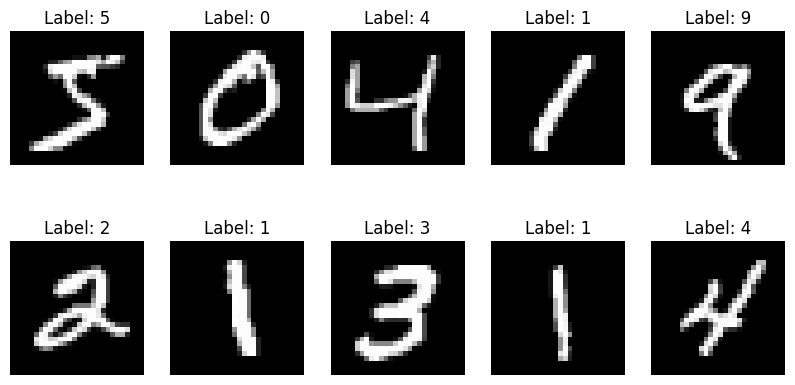

In [32]:
# plot some images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()


## Data Preprocessing
> In this section, we will preprocess the data by reshaping and normalizing it.


In [33]:
# reshape the data
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [34]:
# normalize the data
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [35]:
# on-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


## Model building
>In this section, we will built a convolutional neural network (CNN) to effectively classify the handwritten digits in the MNIST dataset. The CNN architecture will consist of several convolutional layers, followed by pooling layers and a dense layer.

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [37]:
# add layers to the sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [39]:
# train the model
history = model.fit(x_train,y_train,batch_size = 128, epochs = 10, validation_split = 0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7749 - loss: 0.7114 - val_accuracy: 0.9741 - val_loss: 0.0824
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9660 - loss: 0.1109 - val_accuracy: 0.9837 - val_loss: 0.0562
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9757 - loss: 0.0814 - val_accuracy: 0.9874 - val_loss: 0.0449
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9809 - loss: 0.0627 - val_accuracy: 0.9887 - val_loss: 0.0405
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9852 - loss: 0.0509 - val_accuracy: 0.9886 - val_loss: 0.0409
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9869 - loss: 0.0415 - val_accuracy: 0.9898 - val_loss: 0.0366
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9885 - loss: 0.0383 - val_accuracy: 0.9901 - val_loss: 0.0377
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0327 - val_accuracy: 0.

In [40]:
# check loss and the accuracy
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f'Test loss : {test_loss}, Test accuracy : {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9881 - loss: 0.0365
Test loss : 0.028692999854683876, Test accuracy : 0.9911999702453613


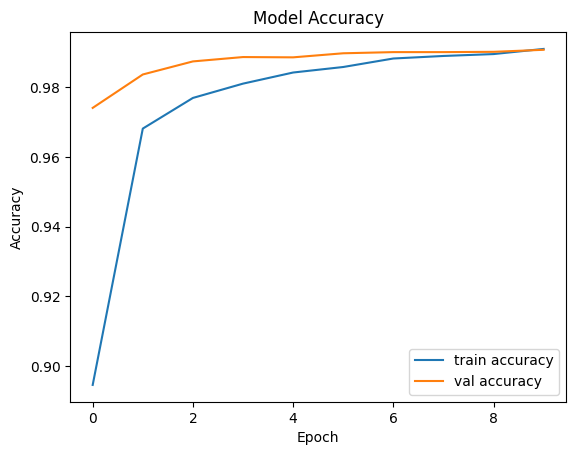

In [41]:
# plot the history
plt.plot(history.history['accuracy'],label = 'train accuracy')
plt.plot(history.history['val_accuracy'],label = 'val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


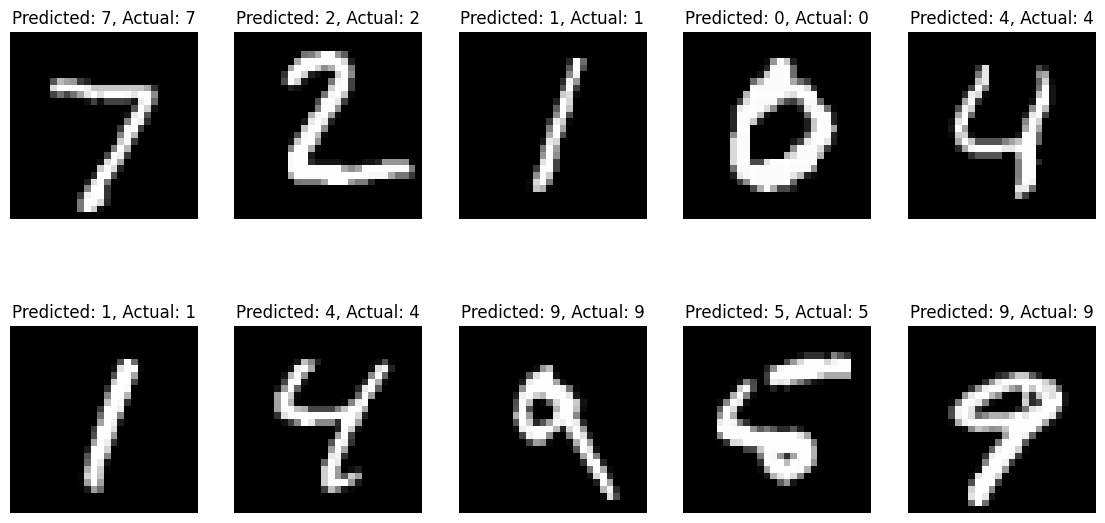

In [42]:
# make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize some predictions
plt.figure(figsize=(14, 7))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}, Actual: {np.argmax(y_test[i])}')
    plt.axis('off')
plt.show()
